Outlier
===

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context("poster")

In [2]:
df = pd.read_hdf('frb_all_zdcpr.h5', 'table', columns=['tmp_269', 'tmp_267'])
df.head()

,tmp_269,tmp_267
timestamp,,
2016-10-01 00:00:00,8.888177,9.188929
2016-10-01 00:00:30,8.886159,9.188753
2016-10-01 00:01:00,8.885336,9.187676
2016-10-01 00:01:30,8.887214,9.185820
2016-10-01 00:02:00,8.883481,9.185944


In [3]:
threshold = 40
threshold_zsc = 3
win_hour = 120
win_day = win_hour * 24
win_week = win_day * 7
win_month = win_day * 30

def plot_rolling(df, window=win_week, min_periods=win_day * 5, fig_title='test', fig_dpi=600):
    """Plot Rolling median and std

    Keyword arguments:
    df -- pd.series
    window -- size of window (according to the array)
    min_periods -- minimum periods for it to plot
    """
    rolmean = df.rolling(window=window, min_periods=min_periods).mean()
    rolmedian = df.rolling(window=window, min_periods=min_periods).median()
    # rolstd = df.rolling(window=window, min_periods=min_periods).std()

    fig, ax1 = plt.subplots()

    ax1.plot(df, label='Data', linewidth=1)
    ax1.plot(rolmean, label='Rolling Mean', linewidth=1)
    ax1.plot(rolmedian, label='Rolling Median', linewidth=1)
    ax1.set_title(fig_title)
    ax1.legend()
    ax1.xaxis.set_major_formatter(dates.DateFormatter("%m/%y"))
    plt.xticks(rotation=90)

    fig_name = fig_title.replace(" ", "_") + '_out3.png'
    plt.savefig('sen_figs/' + fig_name)
    print("NEW FIGURE: {}".format(fig_name))
    plt.close('all')

## Identify Outlier

In [4]:
col = 'tmp_269'

In [6]:
d = pd.DataFrame(df['tmp_269'])
d['median'] = d['tmp_269'].rolling(window=win_hour).median()
difference = np.abs(d['tmp_269'] - d['median'])
outlier_idx = difference >= threshold

In [10]:
d['tmp_269'][outlier_idx]

Series([], Freq: 30S, Name: tmp_269, dtype: float64)

In [12]:
d['zscore'] = (d['tmp_269'] - d['tmp_269'].mean()) / d['tmp_269'].std()
d['zscore'] = d['zscore'].abs()

In [25]:
d.loc[d['zscore'] >= threshold_zsc, 'tmp_269'].head()

timestamp
2016-10-02 07:59:00    18.300410
2016-10-02 07:59:30    18.316578
2016-10-02 08:00:00    18.462547
2016-10-02 08:00:30    18.537348
2016-10-02 08:01:00    18.451297
Name: tmp_269, dtype: float64

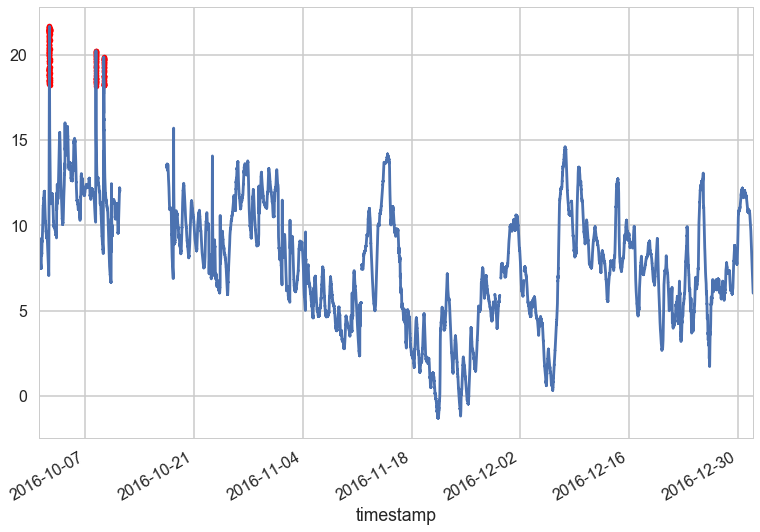

In [23]:
d.loc[d['zscore'] >= threshold_zsc, 'tmp_269'].plot(marker='.', linewidth=0, c='r')
d['tmp_269'].plot()

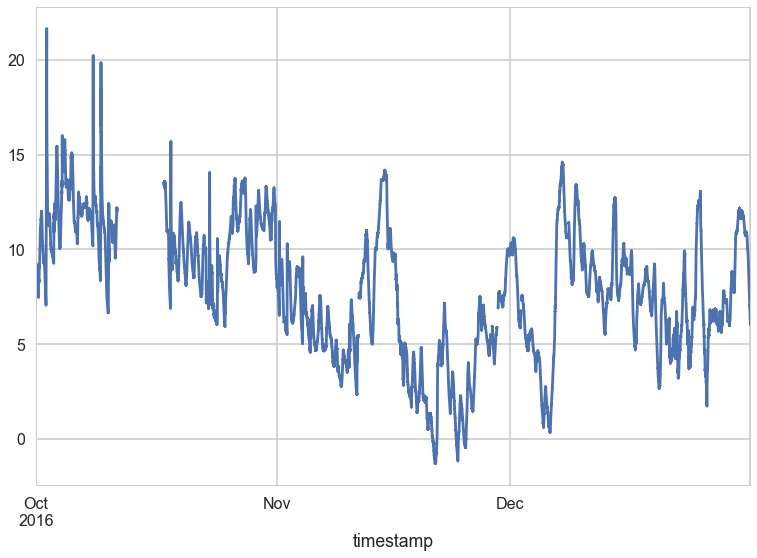

In [17]:
d['tmp_269'].plot()

In [28]:
d['median'] = d[col].rolling(window=win_hour).median()
d['median_diff'] = (d[col] - d['median']).abs()

In [32]:
d.loc[d['median_diff'] >= threshold, col]

Series([], Freq: 30S, Name: tmp_269, dtype: float64)

### Test Script

In [19]:
def na_outlier(series, col):
    d = pd.DataFrame(series)
    plt.figure(dpi=600)
    plt.plot(d[col], label='Data', linewidth=1)
    # identify outliers by rolling method
    d = det_median(d, col)
    # identify outliers by zscore
    d = det_zscore(d, col)

    plt.legend()
    fig_title = 'sensor {}'.format(col)
    plt.title(fig_title)
    fig_name = fig_title.replace(" ", "_") + '_id.png'
#     plt.savefig('sen_figs/' + fig_name)
#     print("NEW FIGURE: {}".format(fig_name))
#     plt.close('all')

    # remove outliers
    d.loc[d['median_diff'] >= threshold, col] = np.nan
    d.loc[d['zscore'] >= threshold_zsc, col] = np.nan

#     return d[col]


def det_median(d, col):
    # remove outliers by rolling method
    d['median'] = d[col].rolling(window=win_hour).median()
    d['median_diff'] = (d[col] - d['median']).abs()
    try:
        plt.plot(d.loc[d['median_diff'] >= threshold, col], marker='.', linewidth=0,
                 c='orange', label='Median Filter', alpha=0.4, markersize=7)
    except:
        pass
    return d


def det_zscore(d, col):
    d['zscore'] = (d[col] - d[col].mean()) / d[col].std()
    d['zscore'] = d['zscore'].abs()
    try:
        plt.plot(d.loc[d['zscore'] >= threshold_zsc, col], marker='.',
                 linewidth=0, c='red', label='Zscore Filter', alpha=0.4, markersize=7)
    except:
        pass
    return d

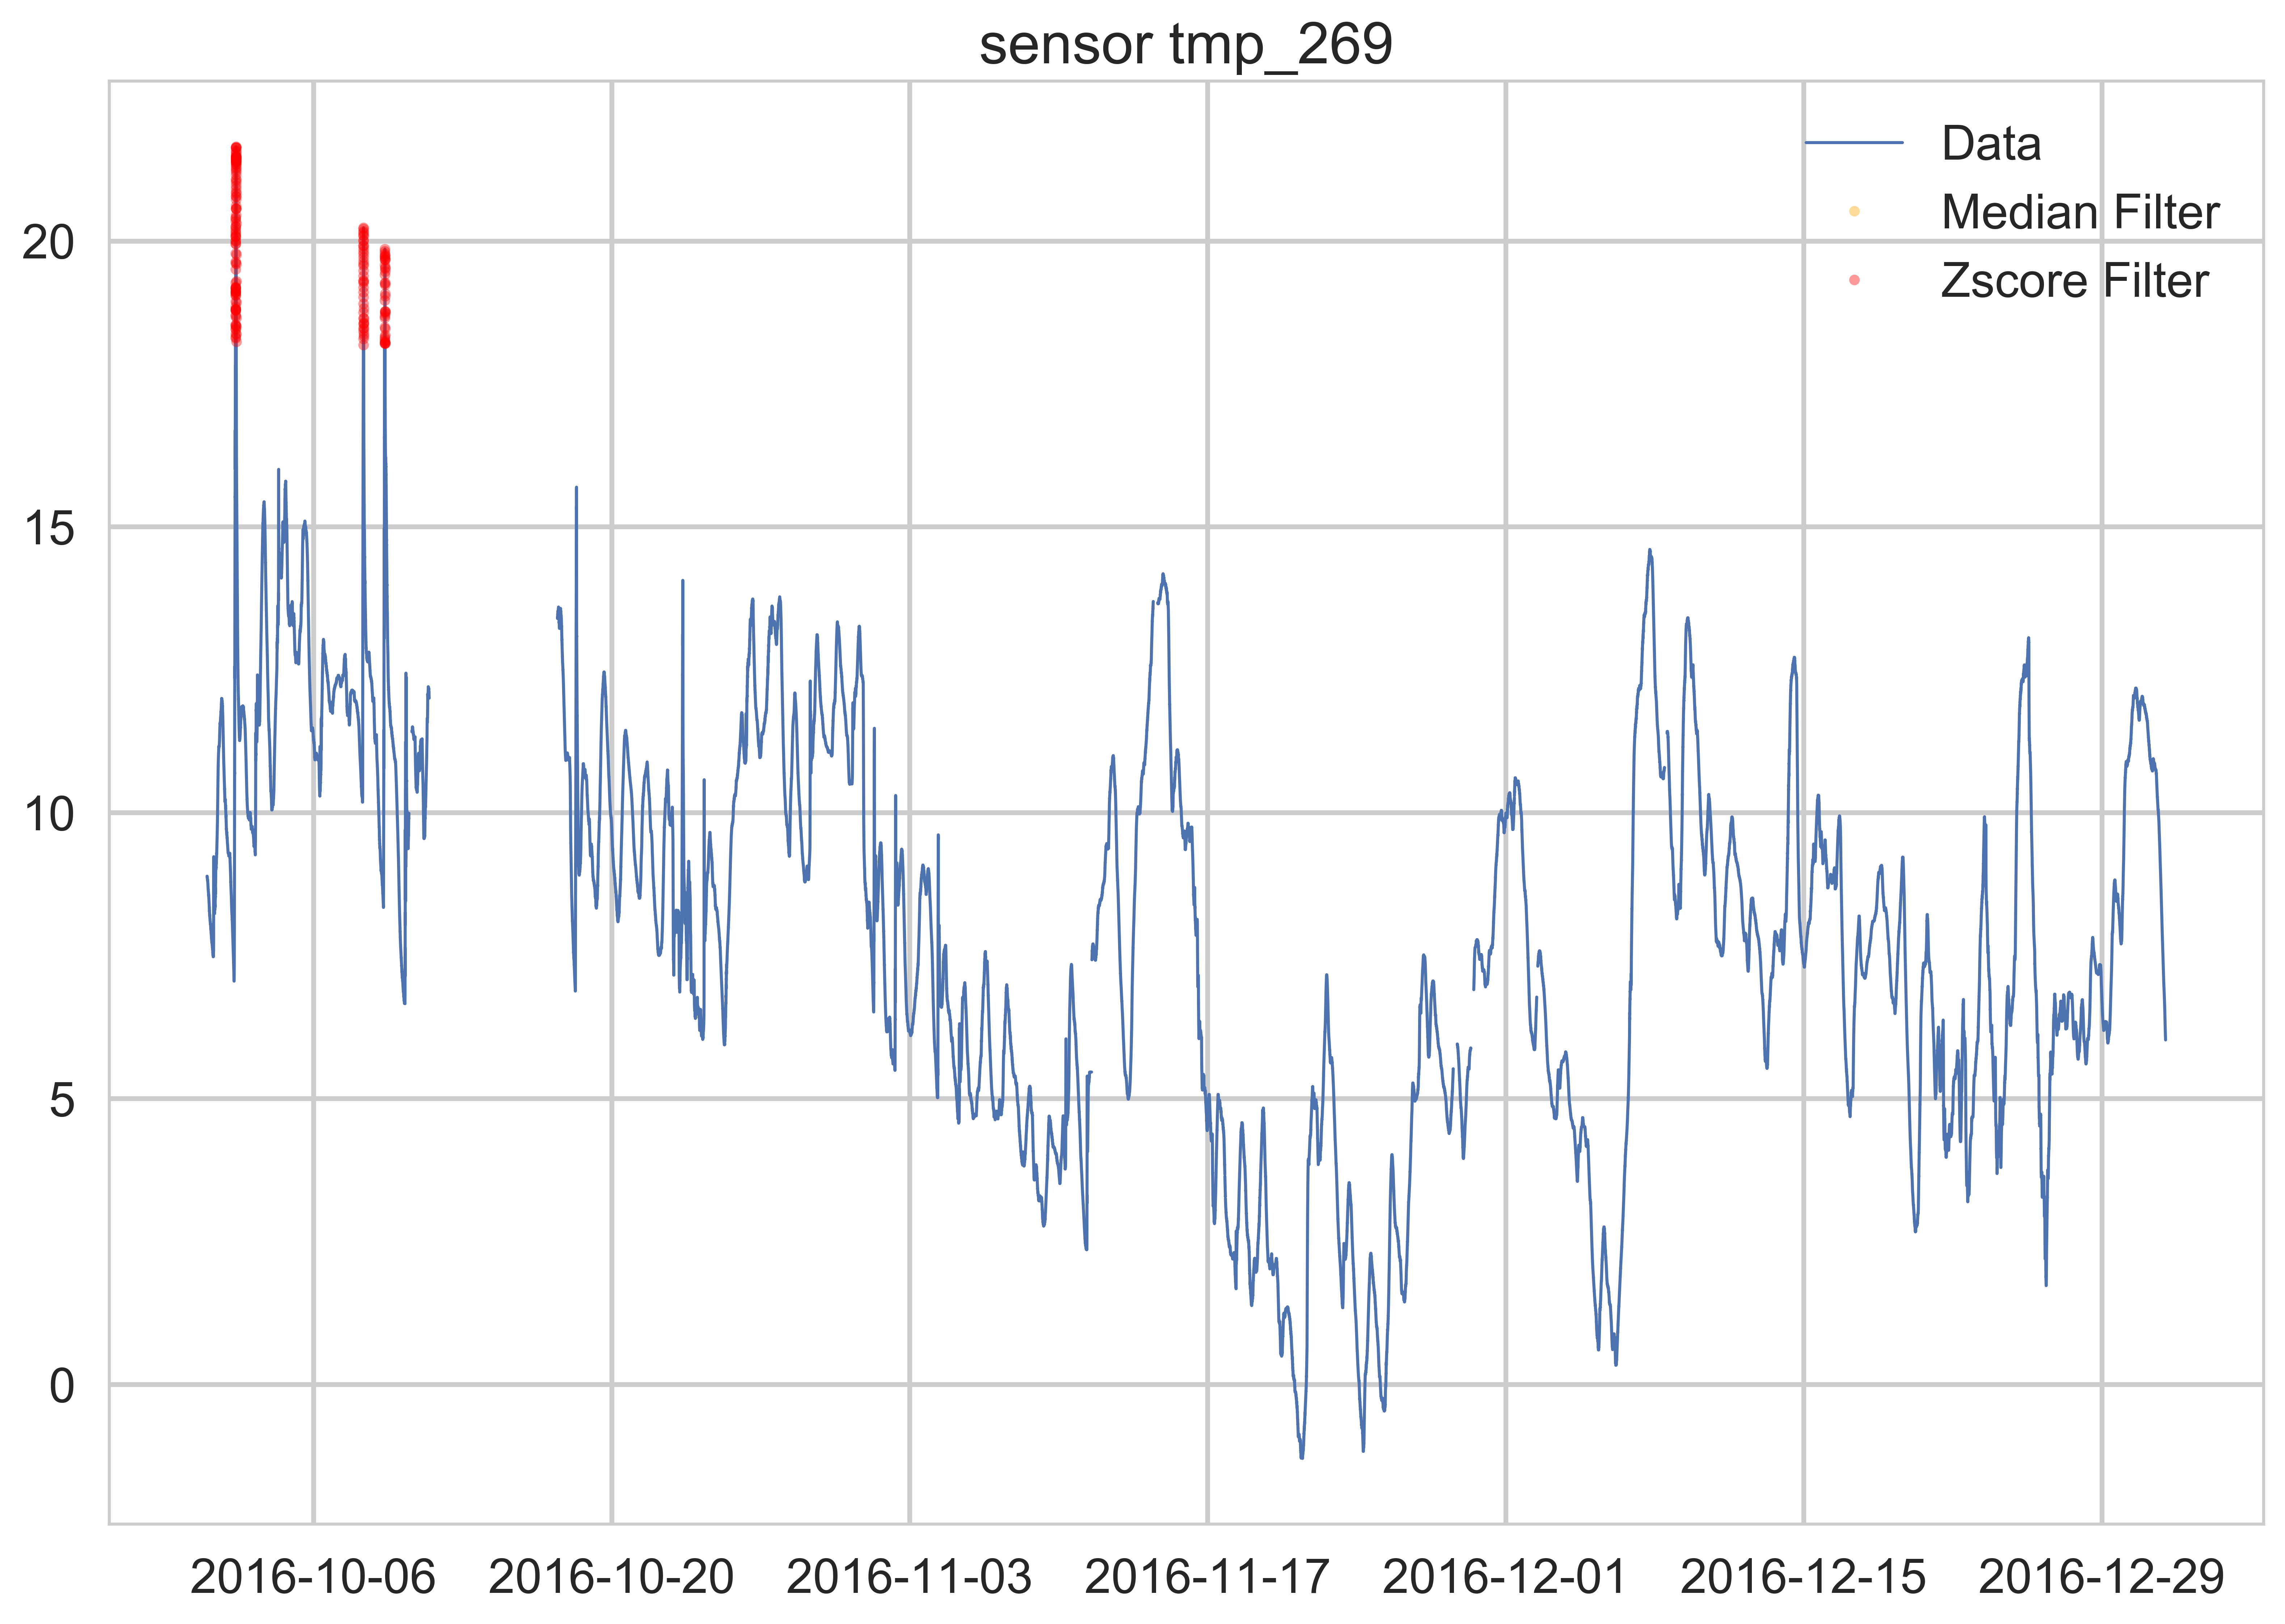

In [20]:
na_outlier(df['tmp_269'], 'tmp_269')